Predicted price for 3300 sq ft: 628715.7534246575
Predicted price for 5000 sq ft: 859554.7945205481
Coefficient (m): 135.78767123287673
Intercept (b): 180616.43835616432


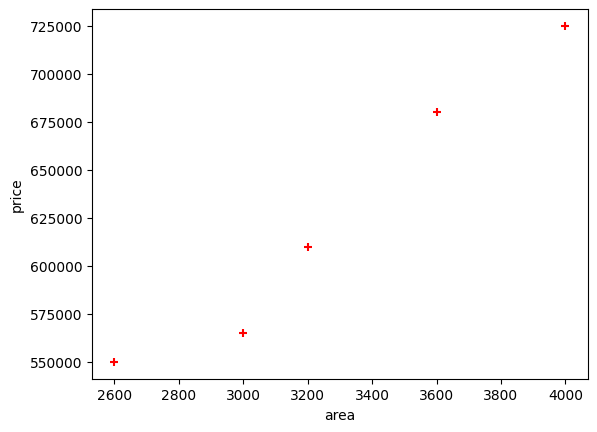

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('housing_area_price.csv')

# Plot data
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

# Prepare training data
X = df[['area']]  # Ensure it's a DataFrame
y = df['price']

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict price of a home with 3300 sq ft area
area_df = pd.DataFrame({'area': [3300]})  # Fix: Pass as DataFrame
predicted_price_3300 = reg.predict(area_df)
print(f"Predicted price for 3300 sq ft: {predicted_price_3300[0]}")

# Predict price of a home with 5000 sq ft area
area_df_5000 = pd.DataFrame({'area': [5000]})  # Fix: Pass as DataFrame
predicted_price_5000 = reg.predict(area_df_5000)
print(f"Predicted price for 5000 sq ft: {predicted_price_5000[0]}")

# Print coefficient and intercept
print(f"Coefficient (m): {reg.coef_[0]}")
print(f"Intercept (b): {reg.intercept_}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('homeprices_Multiple_LR.csv')

# Handle missing values safely (Fix for FutureWarning)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

# Separate independent and dependent variables
X = df.drop('price', axis='columns')  # Features: area, bedrooms, age
y = df['price']  # Target variable

# Train the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Model Coefficients and Intercept
print(f"Coefficients: {reg.coef_}")  # [m1, m2, m3]
print(f"Intercept: {reg.intercept_}")  # b

# Predict price of a home with given features (3000 sq ft, 3 bedrooms, 40 years old)
input_features = pd.DataFrame({'area': [3000], 'bedrooms': [3], 'age': [40]})  # Pass as DataFrame
predicted_price = reg.predict(input_features)

print(f"Predicted Price for 3000 sq ft, 3 bedrooms, 40 years old: {predicted_price[0]}")


Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396
Predicted Price for 3000 sq ft, 3 bedrooms, 40 years old: 498408.2515803067


Predicted per capita income for Canada in 2020: $41288.69


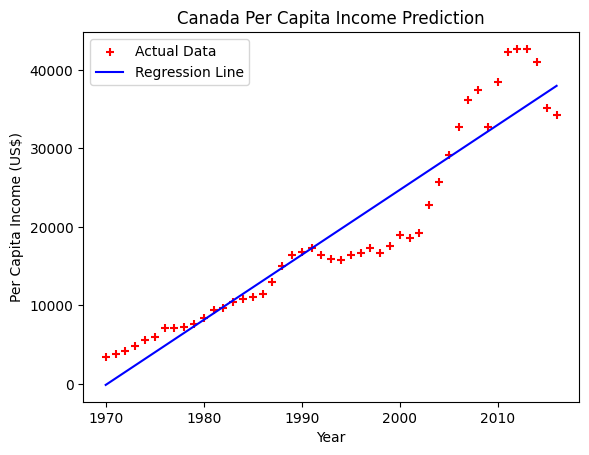

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('canada_per_capita_income.csv')

# Check for missing values
df.fillna(df.median(), inplace=True)  # Fill missing values (if any) with median

# Extract features (X) and target variable (y)
X = df[['year']]  # Independent variable (Year)
y = df['per capita income (US$)']  # Dependent variable (Per capita income)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the per capita income for 2020
year_2020 = pd.DataFrame({'year': [2020]})
predicted_income = model.predict(year_2020)

# Print results
print(f"Predicted per capita income for Canada in 2020: ${predicted_income[0]:.2f}")

# Visualize the data and regression line
plt.scatter(df.year, df['per capita income (US$)'], color='red', marker='+', label='Actual Data')
plt.plot(df.year, model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()


Predicted salary for an employee with 12 years of experience: $139,574.04


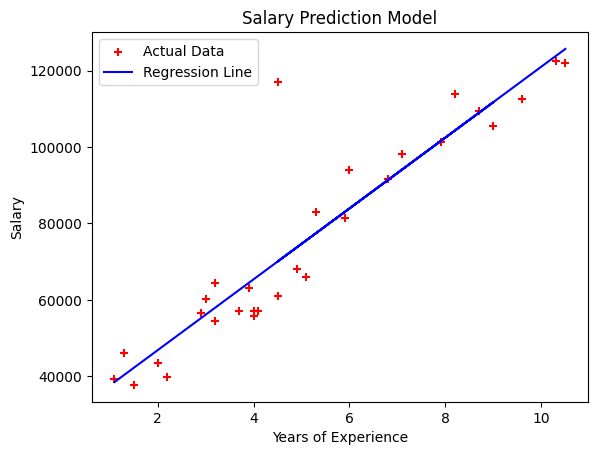

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('salary.csv')

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# Extract features (X) and target variable (y)
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']  # Dependent variable

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years of experience
experience_12 = pd.DataFrame({'YearsExperience': [12]})
predicted_salary = model.predict(experience_12)

# Print results
print(f"Predicted salary for an employee with 12 years of experience: ${predicted_salary[0]:,.2f}")

# Visualize the data and regression line
plt.scatter(df.YearsExperience, df.Salary, color='red', marker='+', label='Actual Data')
plt.plot(df.YearsExperience, model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Model')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('hiring.csv')

# Print actual column names
print("Original Columns:", df.columns.tolist())

# Rename columns to remove extra text
df.rename(columns={
    'test_score(out of 10)': 'test_score',
    'interview_score(out of 10)': 'interview_score',
    'salary($)': 'salary'
}, inplace=True)

# Print updated column names
print("Updated Columns:", df.columns.tolist())

# Create a new copy to avoid chained assignment issues
df = df.copy()

# Handle missing values safely
df['test_score'] = df['test_score'].fillna(df['test_score'].median())
df['interview_score'] = df['interview_score'].fillna(df['interview_score'].median())

# Convert experience text values to numbers
word_to_num = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11
}
df['experience'] = df['experience'].map(word_to_num).fillna(0)

# Extract features (X) and target variable (y)
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for given candidates
candidates = pd.DataFrame({
    'experience': [2, 12],
    'test_score': [9, 10],
    'interview_score': [6, 10]
})
predicted_salaries = model.predict(candidates)

# Print results
for i, salary in enumerate(predicted_salaries):
    print(f"Predicted salary for candidate {i+1}: ${salary:,.2f}")


Original Columns: ['experience', 'test_score(out of 10)', 'interview_score(out of 10)', 'salary($)']
Updated Columns: ['experience', 'test_score', 'interview_score', 'salary']
Predicted salary for candidate 1: $53,205.97
Predicted salary for candidate 2: $92,002.18


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('1000_Companies.csv')

# Encode the categorical "State" column
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Extract features (X) and target variable (y)
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict profit for given inputs
input_data = pd.DataFrame({
    'R&D Spend': [91694.48],
    'Administration': [515841.3],
    'Marketing Spend': [11931.24],
    'State': label_encoder.transform(['Florida'])  # Convert Florida to numeric
})
predicted_profit = model.predict(input_data)

# Print results
print(f"Predicted profit for given inputs: ${predicted_profit[0]:,.2f}")


Predicted profit for given inputs: $511,209.20
